<dl>
    <dt><a href="#Analisis_previo"> 1. Análisis previo dataset</a></dt>
        <dd> Análisis de dato en bruto y su relación</dd>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.metrics import accuracy_score
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
<a name=

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
0,11.257702,2.943174,6.803809,15.873606,5.545977,21.238601,269.800741
1,9.304230,2.709958,5.095496,13.467107,5.900347,18.869122,86.752487
2,NaN,4.936659,6.173092,14.461141,6.763816,22.107658,348.569975
3,9.423370,4.507282,7.762059,15.635129,7.707726,19.378033,415.976620
4,NaN,5.258533,5.760111,13.585080,6.574550,22.045628,346.167361


In [4]:
df.shape

(2010, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Instagram  1985 non-null   float64
 1   Facebook   1971 non-null   float64
 2   Twitter    1956 non-null   float64
 3   Linkedin   1982 non-null   float64
 4   Discord    2000 non-null   float64
 5   Twitch     2010 non-null   float64
 6   Ingresos   2010 non-null   float64
dtypes: float64(7)
memory usage: 110.0 KB


In [6]:
df.describe()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
count,1985.000000,1971.000000,1956.000000,1982.000000,2000.000000,2010.000000,2010.000000
mean,9.971020,4.075464,6.706138,14.960127,7.033877,20.973706,316.573369
std,1.000713,1.012235,1.009279,0.981687,1.018381,0.994449,104.069490
min,6.796837,0.572794,2.673021,11.290172,3.387479,17.660218,-46.952791
25%,9.325907,3.397380,5.986793,14.304720,6.354149,20.308463,244.088089
50%,9.961637,4.074588,6.717924,14.958475,7.056824,20.970154,316.368632
75%,10.608849,4.745205,7.408070,15.648404,7.737820,21.629410,387.564328
max,13.492470,7.205183,10.001590,18.670235,10.682078,24.323364,652.044392


In [7]:
df.isnull().sum()/len(df)*100

Instagram    1.243781
Facebook     1.940299
Twitter      2.686567
Linkedin     1.393035
Discord      0.497512
Twitch       0.000000
Ingresos     0.000000
dtype: float64

In [8]:
rep = ['?',' ','','-',' - ','--','>','<']  # replace strange values with NaN
for j in rep:
    df.replace(j,np.nan,inplace=True)

In [9]:
df.isnull().sum()/len(df)*100 # nulls by columns

Instagram    1.243781
Facebook     1.940299
Twitter      2.686567
Linkedin     1.393035
Discord      0.497512
Twitch       0.000000
Ingresos     0.000000
dtype: float64

In [10]:
df.apply(lambda x: x.notnull().sum()/df.shape[1]*100,axis=1).value_counts()   # nulls by rows

100.000000    1875
85.714286      115
71.428571       19
57.142857        1
dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


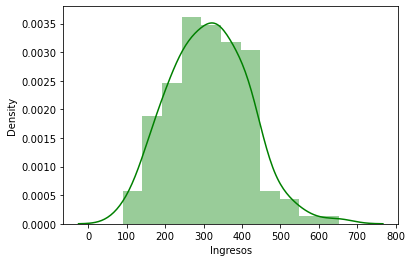

In [11]:
sns.distplot(df[df.isnull().any(axis=1)].Ingresos, axlabel="Ingresos", color="green") #Histograma, se observa una distribución normal en los ingresos con NaNs en las filas, al no estar clusterizados y ser pocos podemos eliminarlos
plt.show()

In [12]:
df.describe()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
count,1985.000000,1971.000000,1956.000000,1982.000000,2000.000000,2010.000000,2010.000000
mean,9.971020,4.075464,6.706138,14.960127,7.033877,20.973706,316.573369
std,1.000713,1.012235,1.009279,0.981687,1.018381,0.994449,104.069490
min,6.796837,0.572794,2.673021,11.290172,3.387479,17.660218,-46.952791
25%,9.325907,3.397380,5.986793,14.304720,6.354149,20.308463,244.088089
50%,9.961637,4.074588,6.717924,14.958475,7.056824,20.970154,316.368632
75%,10.608849,4.745205,7.408070,15.648404,7.737820,21.629410,387.564328
max,13.492470,7.205183,10.001590,18.670235,10.682078,24.323364,652.044392


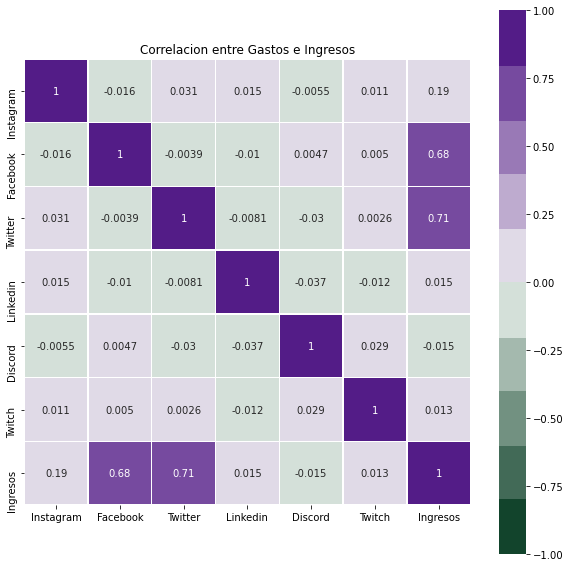

In [13]:
# Establece los límites de colores entre [-1, 1], así como un rango de colores de oscuro a oscuro, pasando por claro (0 correlación)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.title('Correlacion entre Gastos e Ingresos');

# Observamos una correlacion positiva entre el gasto en marketing en Facebook y Twitter y los ingresos de la compañia.

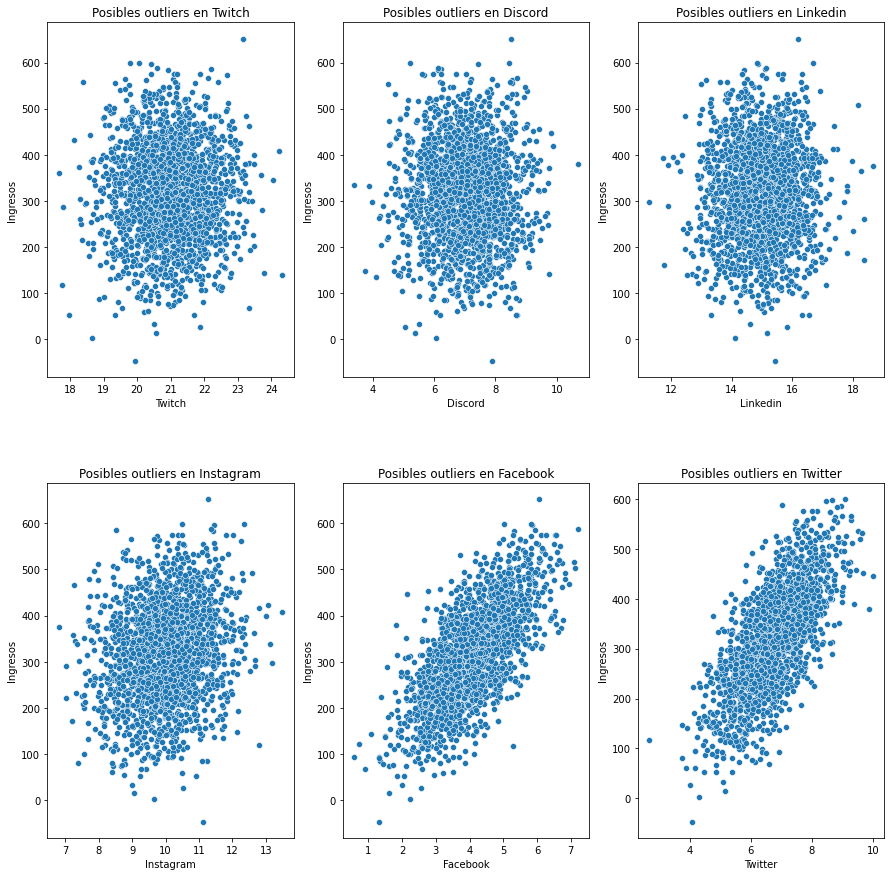

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
plt.subplots_adjust(hspace = 0.3)

sns.scatterplot(data=df, x='Twitch', y='Ingresos', ax=axes[0, 0])
axes[0, 0].set_title("Posibles outliers en Twitch")

sns.scatterplot(data=df, x='Discord', y='Ingresos', ax=axes[0, 1])
axes[0, 1].set_title("Posibles outliers en Discord")

sns.scatterplot(data=df, x='Linkedin', y='Ingresos', ax=axes[0, 2])
axes[0, 2].set_title("Posibles outliers en Linkedin")

sns.scatterplot(data=df, x='Instagram', y='Ingresos', ax=axes[1, 0])
axes[1, 0].set_title("Posibles outliers en Instagram")

sns.scatterplot(data=df, x='Facebook', y='Ingresos', ax=axes[1, 1])
axes[1, 1].set_title("Posibles outliers en Facebook")

sns.scatterplot(data=df, x='Twitter', y='Ingresos', ax=axes[1, 2])
axes[1, 2].set_title("Posibles outliers en Twitter");

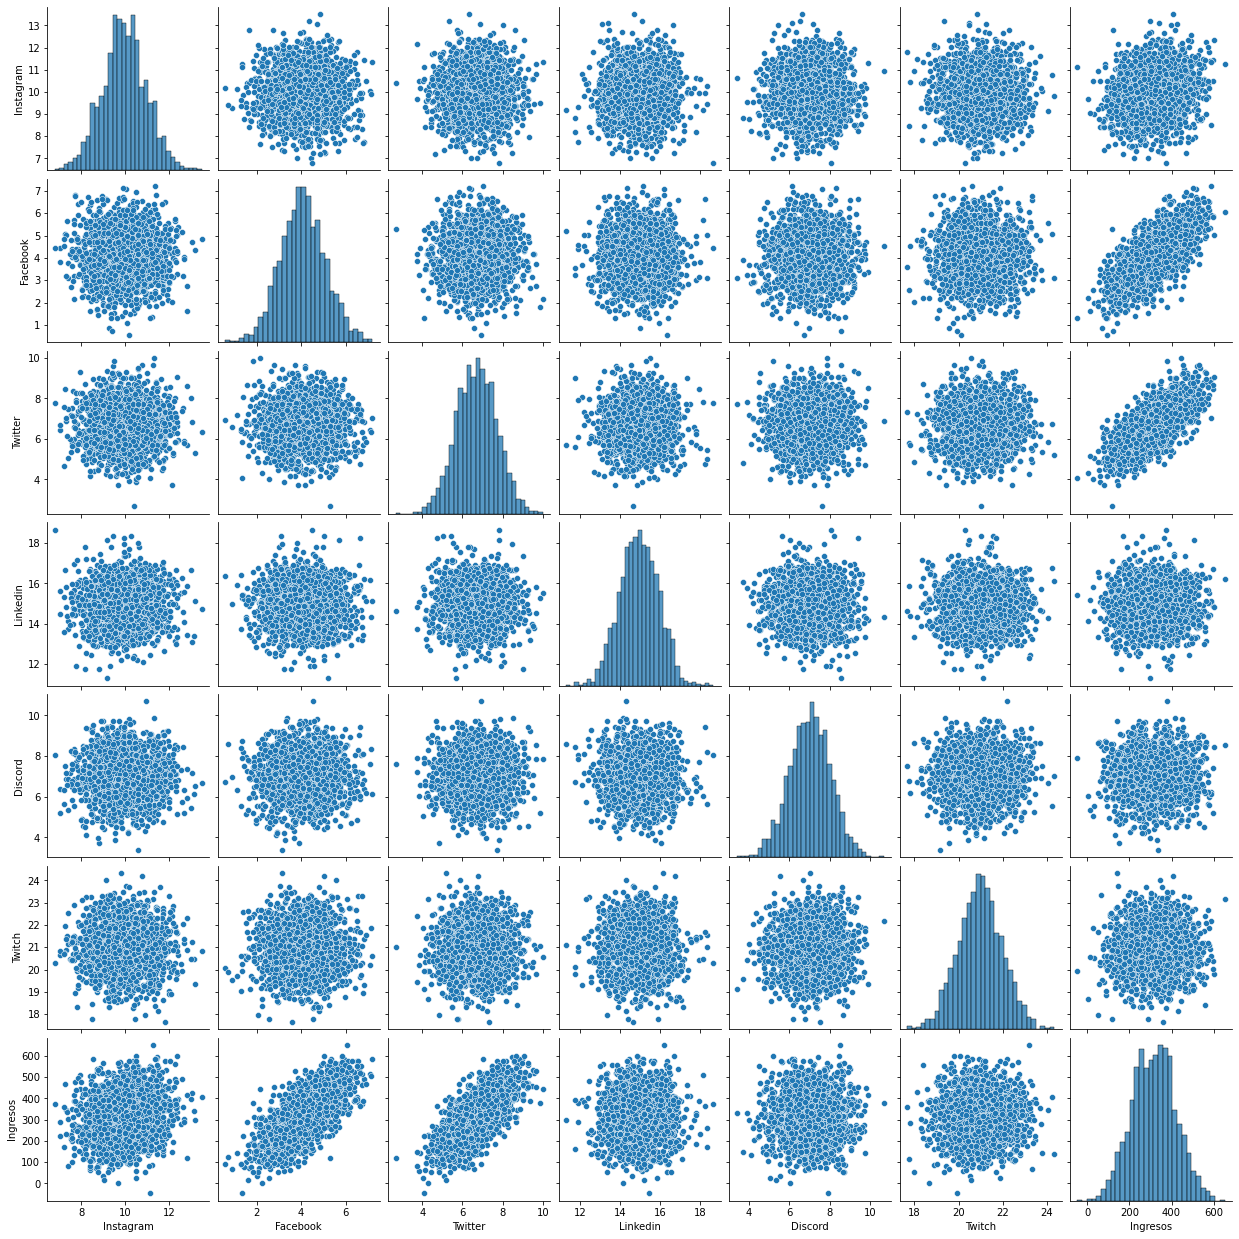

In [15]:
sns.pairplot(df) 
# observamos una asociacion positiva entre facebook y twitter y los ingresos
# adicionalmente vemos que los gastos en cada red social siguen una distribucion normal

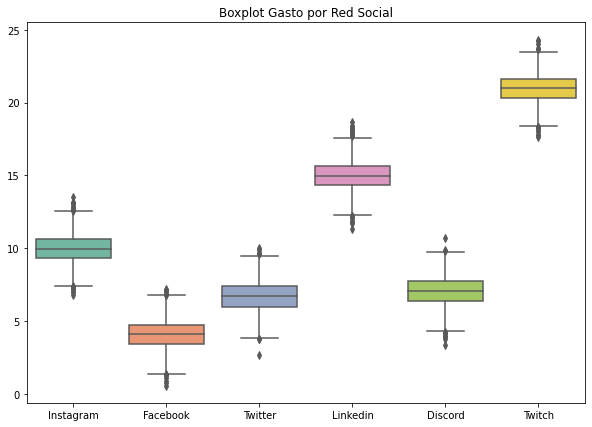

In [16]:
# si bien observamos valores más allá de los maximos y minimos en cada red social, no detectamos valores demasiado extremos 
# que deberiamos considerar eliminar
# se observa que el gasto en Facebook y Twitter (las redes con más correlaciones con los ingresos de la empresa) 
# son los más bajos de todas la redes sociales, a priori las empresas deberían considerar incrementar el presupuesto en las mismas.
plt.figure(figsize=(10,7))
sns.boxplot(data=df.drop('Ingresos',axis=1), orient="v", palette="Set2")
plt.title('Boxplot Gasto por Red Social');

In [53]:
suma = df.drop('Ingresos', axis=1).sum(axis=1).values
roi,inversion,ganancia = [],[],[]
for i,k in zip(suma,df.Ingresos):
    roi.append((round((k-i)/i,3)))
    inversion.append(round(i,2))
    ganancia.append(round(k,2))


datos = pd.DataFrame()
datos['ROI'] = roi
datos['Inversion'] = inversion
datos['Ganancia'] =ganancia
#datos.sort_values(by = 'ROI')
dias = pd.concat([df, datos.dropna()], axis = 1,ignore_index=True)
datos

,ROI,Inversion,Ganancia
0,3.238,63.66,269.80
1,0.567,55.35,86.75
2,5.458,64.41,415.98
3,7.104,64.03,518.91
4,3.897,62.29,305.01
...,...,...,...
1869,2.747,61.57,230.72
1870,6.508,69.89,524.78
1871,2.810,61.41,233.97
1872,3.612,65.08,300.17


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


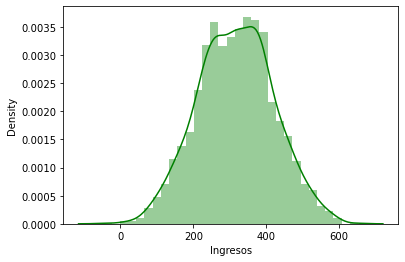

In [19]:
sns.distplot(df["Ingresos"], axlabel="Ingresos", color="green") #Histograma, se observa una distribución normal en los ingresos, sin kurtosis (pocos outliers) y sin skewness (el gráfico no se observa agrupado a costados de la grafica)
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Ingresos'>

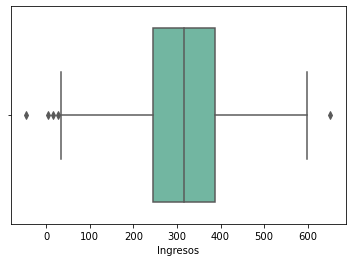

In [20]:
sns.boxplot(data=df, x = 'Ingresos', orient="v", palette="Set2") # 

In [21]:
df.describe()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
count,1985.000000,1971.000000,1956.000000,1982.000000,2000.000000,2010.000000,2010.000000
mean,9.971020,4.075464,6.706138,14.960127,7.033877,20.973706,316.573369
std,1.000713,1.012235,1.009279,0.981687,1.018381,0.994449,104.069490
min,6.796837,0.572794,2.673021,11.290172,3.387479,17.660218,-46.952791
25%,9.325907,3.397380,5.986793,14.304720,6.354149,20.308463,244.088089
50%,9.961637,4.074588,6.717924,14.958475,7.056824,20.970154,316.368632
75%,10.608849,4.745205,7.408070,15.648404,7.737820,21.629410,387.564328
max,13.492470,7.205183,10.001590,18.670235,10.682078,24.323364,652.044392


<AxesSubplot:>

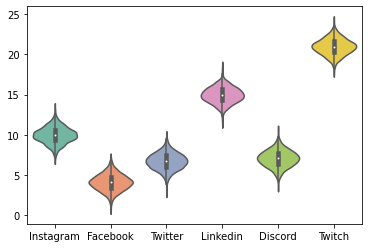

In [22]:
# se observa que el gasto en cada red social se agrupa acorde a una distribución normal a través de las campañas de marketing
sns.violinplot(data=df.drop('Ingresos',axis=1), orient="v", palette="Set2")

In [23]:
df.describe()

,Instagram,Facebook,Twitter,Linkedin,Discord,Twitch,Ingresos
count,1985.000000,1971.000000,1956.000000,1982.000000,2000.000000,2010.000000,2010.000000
mean,9.971020,4.075464,6.706138,14.960127,7.033877,20.973706,316.573369
std,1.000713,1.012235,1.009279,0.981687,1.018381,0.994449,104.069490
min,6.796837,0.572794,2.673021,11.290172,3.387479,17.660218,-46.952791
25%,9.325907,3.397380,5.986793,14.304720,6.354149,20.308463,244.088089
50%,9.961637,4.074588,6.717924,14.958475,7.056824,20.970154,316.368632
75%,10.608849,4.745205,7.408070,15.648404,7.737820,21.629410,387.564328
max,13.492470,7.205183,10.001590,18.670235,10.682078,24.323364,652.044392


In [24]:
# analizamos la cantidad de outliers en los ingresos y si los eliminamos o no, observamos pocos outiers
df[(df['Ingresos']<-46) | (df['Ingresos']>652)].shape

(2, 7)

In [25]:
## MACHINE LEARNING

In [26]:
# eliminamos outliers 
df.drop(df[(df['Ingresos']<-46) | (df['Ingresos']>652)].index,inplace=True)

In [27]:
# eliminamos valores Nans
df.dropna(axis=0,inplace=True)

In [28]:
X = df.drop('Ingresos',axis=1)
y = df[['Ingresos']]

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X_scal = scaler_x.transform(X)
X = pd.DataFrame(X_scal,columns = X.columns)

scaler_y = MinMaxScaler()
scaler_y.fit(y)
y_scal = scaler_y.transform(y)
y = pd.DataFrame(y_scal,columns = y.columns).values.ravel()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=13)

params = {
    "n_estimators": 2000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    
}

In [31]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0002


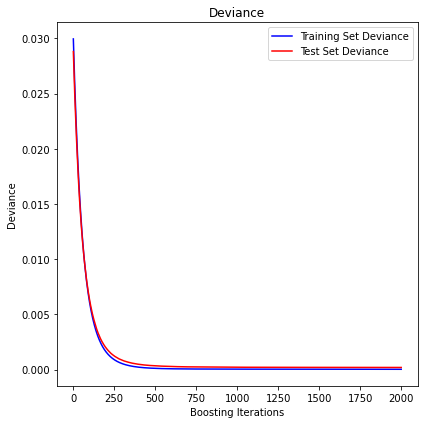

In [32]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [33]:
X_test = pd.read_csv('Test_predictors.csv')

In [34]:
X_test = scaler_x.transform(X_test.values)

In [35]:
X_test = pd.read_csv('Test_predictors.csv')
X_test = scaler_x.transform(X_test.values)
yhat = reg.predict(X_test)
prediccion = scaler_y.inverse_transform(yhat.reshape(-1,1))
prediccion = pd.DataFrame(prediccion,columns=['Predict'])
prediccion.to_json('predict.json',orient='records')
pred = pd.read_json('predict.json')
pred.head()

,Predict
0,380.259659
1,240.361911
2,283.249283
3,357.710273
4,310.289009


In [36]:
yhat = reg.predict(X_test)

In [37]:
prediccion = scaler_y.inverse_transform(yhat.reshape(-1,1))

In [38]:
prediccion = pd.DataFrame(prediccion,columns=['Predict'])

In [39]:
prediccion.head()

,Predict
0,380.259659
1,240.361911
2,283.249283
3,357.710273
4,310.289009


In [40]:
ix = list()
for i in prediccion.index:
    ix.append('predict')
prediccion.index = ix

In [41]:
prediccion.head()

,Predict
predict,380.259659
predict,240.361911
predict,283.249283
predict,357.710273
predict,310.289009


In [42]:
prediccion.to_json('predict.json',orient='records')

In [43]:
pred = pd.read_json('predict.json')
pred.head()

,Predict
0,380.259659
1,240.361911
2,283.249283
3,357.710273
4,310.289009


In [44]:
## LINEAR REGRESSION MODEL

In [45]:
# utilizamos el modelo OLS  # se observan muchas variables con un p-value elevado
import statsmodels.api as sm

sm_X1_var = sm.add_constant(X)
slr_model = sm.OLS(y, sm_X1_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.431e+10
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:02:27   Log-Likelihood:                 17967.
No. Observations:                1874   AIC:                        -3.592e+04
Df Residuals:                    1867   BIC:                        -3.588e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4962   3.34e-06  -1.48e+05      0.000      -0.496      -0.496
Instagram      0.2065   2.59e-06   7.97e+04      0.000       0.206       0.206
Facebook       0.7892   2.52e-06   3.13e+05      0.000       0.789       0.789
Twitter        0.8925    2.8e-06   3.18e+05      0.000       0.893       0.893
Linkedin       0.0337   2.88e-06   1.17e+04      0.000       0.034       0.034
Discord    -4.018e-06   2.63e-06     -1.528      0.127   -9.18e-06    1.14e-06
Twitch     -9.024e-07   2.58e-06     -0.350      0.726   -5.96e-06    4.15e-06
==============================================================================
Omnibus:                        4.386   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                4.963
Skew:                           0.027   Prob(JB):                       0.0836
Kurtosis:                       3.246   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# primero validamos el modelo usando k-fold cross validation como metodo de validacion
from sklearn.model_selection import cross_val_score  

regresion_lineal = linear_model.LinearRegression()

scores = cross_val_score(regresion_lineal, X, y, cv=10, scoring ='r2')
print(scores)
print("*****"*10)
print("R2: ", scores.mean())  

[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]
**************************************************
R2:  0.9999999907503554


In [47]:
# test, train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [48]:
regresion_lineal = linear_model.LinearRegression()  # entrenamos el modelo
regresion_lineal.fit(X_train, y_train) 

LinearRegression()

In [49]:
yhat = regresion_lineal.predict(X_test)  # realizamos predicciones y calculamos yhat

In [50]:
# metricas del modelo, observamos valores altos en r2 y r2 ajustada, mse bajo

r2_sin_ajustar = regresion_lineal.score(X_test, y_test) 
r2_ajustada = 1 - (1-regresion_lineal.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(mean_squared_error(yhat,y_test))

2.920140421262666e-10


In [51]:
print(mean_squared_error(y_test,yhat))

2.920140421262666e-10


In [52]:
X_test = pd.read_csv('Test_predictors.csv')
X_test = scaler_x.transform(X_test.values)
yhat = regresion_lineal.predict(X_test)
prediccion = scaler_y.inverse_transform(yhat.reshape(-1,1))
prediccion = pd.DataFrame(prediccion,columns=['Predict'])
prediccion.to_json('predict.json',orient='records')
pred = pd.read_json('predict.json')
pred.head()

,Predict
0,374.940203
1,231.781664
2,283.458957
3,359.277471
4,310.721257
